# Part I - (Ford GoBike Exploration )
## by (Omer Mazor)

## Introduction
>
Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.image as mpimg
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
print(df_bike.shape)
print(df_bike.dtypes)


(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [ ]:
df_bike.isnull().sum().sum()

17318

In [ ]:
df_bike.dropna(inplace=True)
df_bike.isnull().sum().sum()

0

In [ ]:
print(df_bike.nunique())


duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64


In [ ]:
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [ ]:
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])


In [ ]:
df_bike['start_time'].dt.year.unique()

array([2019])

In [ ]:
df_bike['age'] = 2023-df_bike['member_birth_year']
df_bike['age']=df_bike['age'].astype(int)

In [ ]:
df_bike['start_hour'] = df_bike['start_time'].dt.hour


In [ ]:
df_bike['start_month'] = df_bike['start_time'].dt.month


In [ ]:
df_bike.describe

<bound method NDFrame.describe of         duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4               1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5               1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
...              ...                     ...                     ...   
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

        start_station_id                                start_station_name  \
0                   21.

### What is the structure of your dataset?

> A dataset containing 183,412 rides and 16 features was later reduced to 174952 rides and 21 features after feature engineering. There are 12 categorical(string) variables, 2 datetime, 7 float and  1 int .

### What is/are the main feature(s) of interest in your dataset?

> Comparing durations across genders and ages

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> By comparing duration and month, we can compare different types of users, such as gender and age.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



In [ ]:
counts = df_bike['start_station_name'].value_counts().reset_index(name='number_of_trips')[:30]
order=counts['index']

In [ ]:
sub=df_bike.loc[df_bike['start_station_name'].isin(counts["index"])]


What is the most common start station?

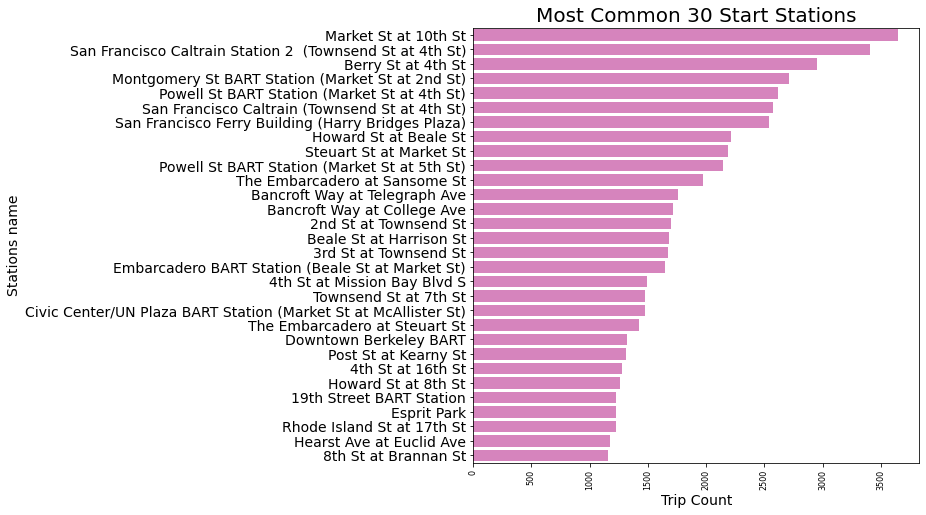

In [ ]:
base_color=sb.color_palette()[6]
plt.figure(figsize=[8,8])
ax=sb.countplot(data=sub,y='start_station_name', color=base_color, order=order)
plt.xticks(rotation=90,size=8)
plt.yticks(size=14)
plt.ylabel('Stations name',size=14)
plt.xlabel('Trip Count',size=14)
plt.title('Most Common 30 Start Stations',size=20);

In [ ]:
counts_end = df_bike['end_station_name'].value_counts().reset_index(name='number_of_trips')[:30]
order_end=counts_end['index']

In [ ]:
sub_end=df_bike.loc[df_bike['end_station_name'].isin(counts_end["index"])]

What is the most common end station?

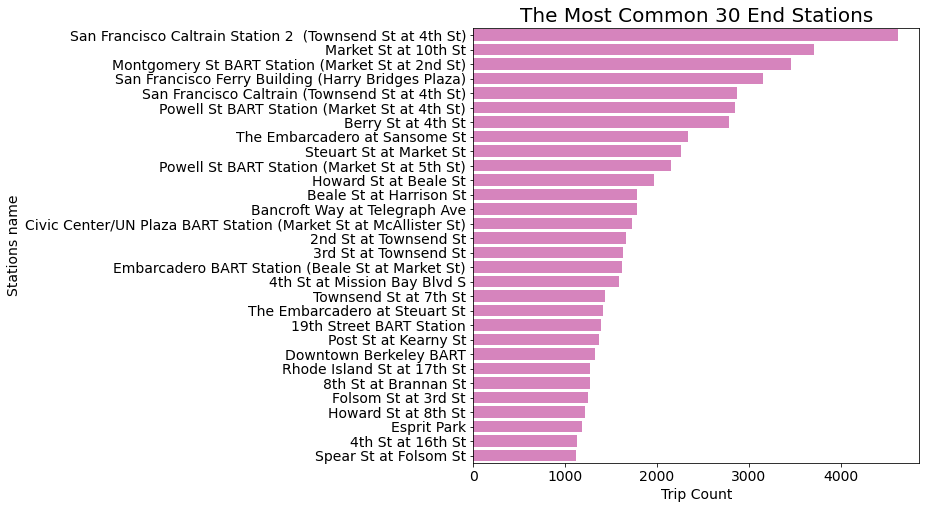

In [ ]:
plt.figure(figsize=[8,8])
ax=sb.countplot(data=sub_end,y='end_station_name', color=base_color,order=order_end)
plt.ylabel('Stations name',size=14)
plt.xlabel('Trip Count',size=14)
plt.title('The Most Common 30 End Stations',size=20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

How many stations are in the top 30 of both the start stations and the end stations?

In [ ]:
(order_end.isin (order)).sum()

28

>It is evident from the above that the most common start and end stations are also the most common.

In [ ]:
df_bike.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,start_hour,start_month
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,38.196865,13.456165,2.0
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731,4.734282,0.0
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,22.000000,0.000000,2.0
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,31.000000,9.000000,2.0
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,36.000000,14.000000,2.0
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,43.000000,17.000000,2.0
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,145.000000,23.000000,2.0


>I found that there are incorrect entries in the age column of the dataset, so I'll remove any data above 120 years old because it's highly unlikely.

In [ ]:
df_bike=df_bike.query('age < 120')

What is the Distribution of Trip Duration?

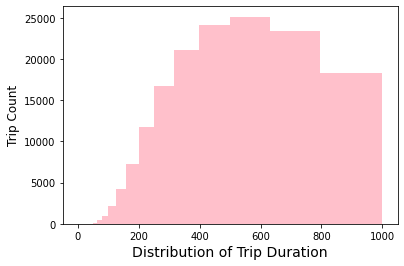

In [ ]:
#from udacity lesson - Univariate Exploration
def scales():
    df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
    bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
    ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    labels = ['{}'.format(val) for val in ticks]
    plt.hist(data = df_bike, x = 'duration_sec', bins = bins, color='pink')
    plt.ylabel('Trip Count', size=12)
    plt.xlabel('Distribution of Trip Duration', size=14)

scales()

In [ ]:
df_bike['trip_month'] = df_bike.start_time.dt.strftime('%b')
df_bike['trip_day'] = df_bike.start_time.dt.strftime('%a')
df_bike['trip_hour'] = df_bike.start_time.dt.strftime('%H')

/var/folders/81/3w0d27sd4j7f2yt97_fsxsk00000gn/T/ipykernel_46253/2255274868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike['trip_month'] = df_bike.start_time.dt.strftime('%b')
/var/folders/81/3w0d27sd4j7f2yt97_fsxsk00000gn/T/ipykernel_46253/2255274868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike['trip_day'] = df_bike.start_time.dt.strftime('%a')
/var/folders/81/3w0d27sd4j7f2yt97_fsxsk00000gn/T/ipykernel_46253/2255274868.py:3: SettingWithCopyWarning: 
A value is trying to be set o

In which day of week are most trips?

<AxesSubplot:xlabel='trip_day', ylabel='count'>

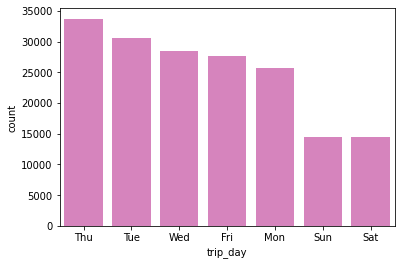

In [ ]:
fig, ax = plt.subplots()
day_counts = df_bike['trip_day'].value_counts()
day_order = day_counts.sort_values().index[::-1]
sb.countplot(data=df_bike, x='trip_day', color=sb.color_palette()[6], order=day_order, ax=ax)

>Thursday

which type of user is larger?

Text(0.5, 1.0, 'Types of the Users')

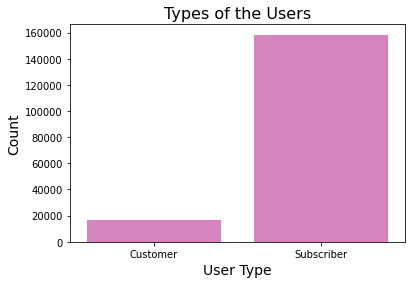

In [ ]:
color = sb.color_palette()[6]
ax = sb.countplot(data=df_bike, x='user_type', color=color)
ax.set_xlabel('User Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Types of the Users', fontsize=16)

> We can see that most users are subscribers.

what is the Distribution Start Hour of the Trip?

Text(0.5, 1.0, 'Start Hour of the Trip Distribution')

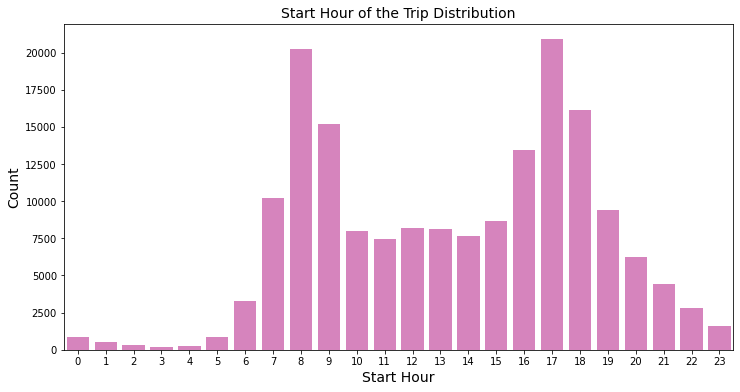

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sb.countplot(data=df_bike, x='start_hour', color=base_color, ax=ax)
ax.set_xlabel('Start Hour', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Start Hour of the Trip Distribution', fontsize=14)

>We can see that the barplot is bimodal with two peaks at 8:00 and also at 17:00 so the most common periods of the day when trips start are around 8 am and 5 pm.

what is the Distribution of Gender Users?

Text(0.5, 1.0, 'The Gender of the Users')

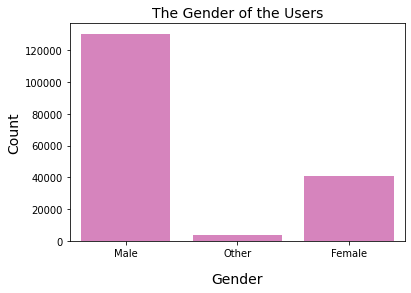

In [ ]:
fig, ax = plt.subplots()
sb.countplot(data=df_bike, x='member_gender', color=base_color, ax=ax)
ax.set_xlabel('Gender', labelpad=14, fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('The Gender of the Users', fontsize=14)

> we can see that most users are males.

what is the most common users age?

Text(0.5, 1.0, 'The Distribution of Users Age')

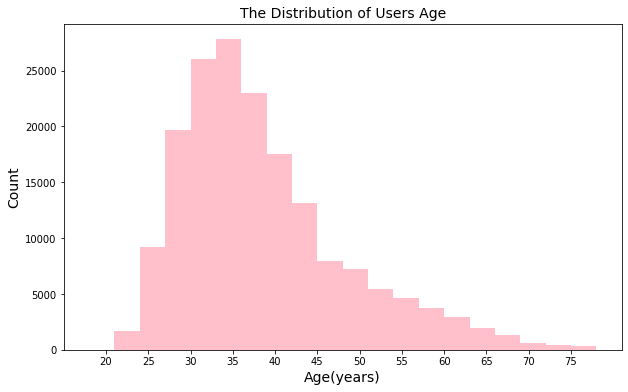

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(data=df_bike, x='age', bins=bins, color='pink')
ax.set_xticks(np.arange(20,80,5))
ax.set_xlabel('Age(years)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('The Distribution of Users Age', fontsize=14)

> we can see that the most common users age are around 25 - 35.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Using a logarithmic scale transformation and an x-axis limit, I focused on the most frequent interval. Due to the right-skewed curve of the duration, I added a logarithmic scale transformation. There was a peak around 300 seconds on the curve, which appeared unimodal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most users are 25-35 years old.

Regarding the Start Hour, the curve is bimodal showing that the most common periods of the day when trips start are around 8 am and 5 pm.

Most users are subscribers and males.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

what is the Age and Duration?

Text(0.5, 1.0, 'Age and Duration')

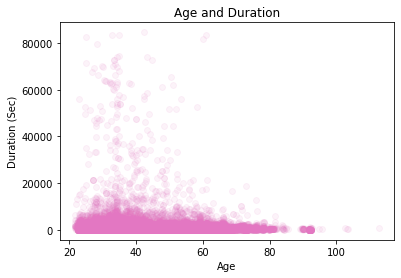

In [ ]:
fig, ax = plt.subplots()
sb.regplot(data=df_bike, x='age', y='duration_sec', fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/12}, color=base_color, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Duration (Sec)')
ax.set_title('Age and Duration')

> The scatter plot shows a weak negative relationship between the duration and the age.

what is the Duration Trip by Gender?

Text(0.5, 1.0, 'Gender and Duration Trip')

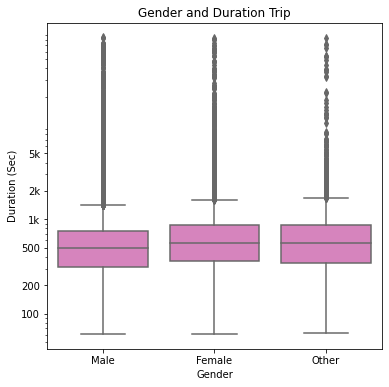

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sb.boxplot(data=df_bike, x='member_gender', y='duration_sec', color=base_color, order=['Male', 'Female', 'Other'], ax=ax)
ax.set_yscale('log')
y_ticklocs = [100, 200, 500, 1e3, 2e3, 5e3]
y_ticklabels = ['100', '200', '500', '1k', '2k', '5k']
ax.set_yticks(y_ticklocs)
ax.set_yticklabels(y_ticklabels)
ax.set_xlabel('Gender')
ax.set_ylabel('Duration (Sec)')
ax.set_title('Gender and Duration Trip')

> We can see that males have shorter trips than other genders.

what is the Duration Trip by User Type?

Text(0.5, 1.0, 'Duration Trip by User Type')

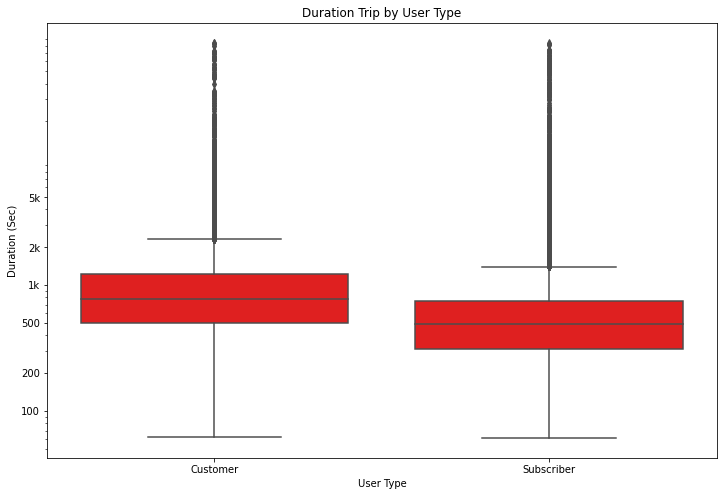

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.boxplot(data=df_bike, x='user_type', y='duration_sec', color='red', ax=ax)
ax.set_yscale('log')
y_ticklocs = [100, 200, 500, 1e3, 2e3, 5e3]
y_ticklabels = ['100', '200', '500', '1k', '2k', '5k']
ax.set_yticks(y_ticklocs)
ax.set_yticklabels(y_ticklabels)
ax.set_xlabel('User Type')
ax.set_ylabel('Duration (Sec)')
ax.set_title('Duration Trip by User Type')


> we can see that customers have longer trips than subscribers.

does User Type is related to Age?

Text(0.5, 1.0, 'User Type and Age')

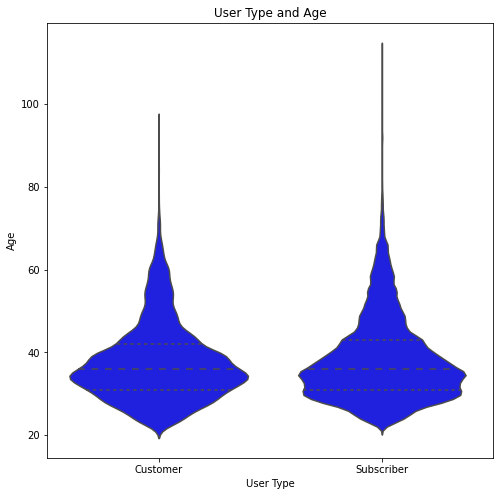

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sb.violinplot(data=df_bike, x='user_type', y='age', color='blue', inner='quartile', ax=ax)
ax.set_xlabel('User Type')
ax.set_ylabel('Age')
ax.set_title('User Type and Age')

> The violinplot isnt showing that the user type is related to the age.

is there relationship between Gender and User Type?

Text(0.5, 1.0, 'Gender and User Type')

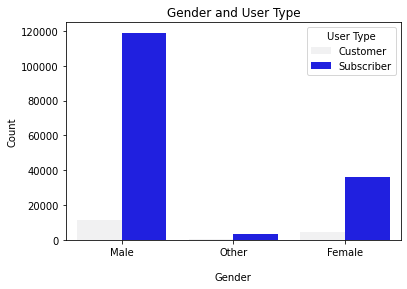

In [ ]:
fig, ax = plt.subplots()
sb.countplot(data=df_bike, x='member_gender', hue='user_type', color='blue', ax=ax)
ax.set_xlabel('Gender',labelpad=15)
ax.set_ylabel('Count')
ax.legend(title='User Type')
ax.set_title('Gender and User Type')

> We can see that there isnt apparent relationship between Gender and User Type.

in what age Bike Sharing is more common?

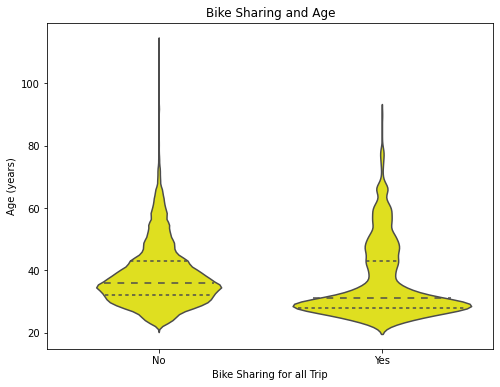

In [ ]:
plt.figure(figsize=[8,6])
sb.violinplot(data=df_bike,x='bike_share_for_all_trip',y='age',color='yellow',inner='quartile')
plt.xlabel('Bike Sharing for all Trip')
plt.ylabel ('Age');
plt.title('Bike Sharing and Age');

> We can see that sharing the bike is more common with young users around 20 age.

what is the Distribution of Bike Sharing and Gender?

In [ ]:
g = sb.FacetGrid(data=df_bike,col='bike_share_for_all_trip',col_wrap=2)
g.map(sb.countplot,'member_gender',color='gray')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Bike Sharing and Gender');

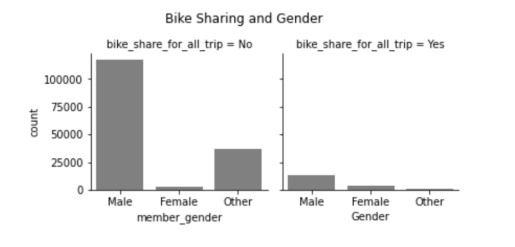

In [5]:
img = mpimg.imread('bike_sharing_and_gender.png')
plt.imshow(img)
plt.axis('off')
plt.show()

> we can see that there are no apparent relationship between Bike Sharing and Gender.

What is the Distribution The Top 30 Start Stations that has the Longest mean Duration?

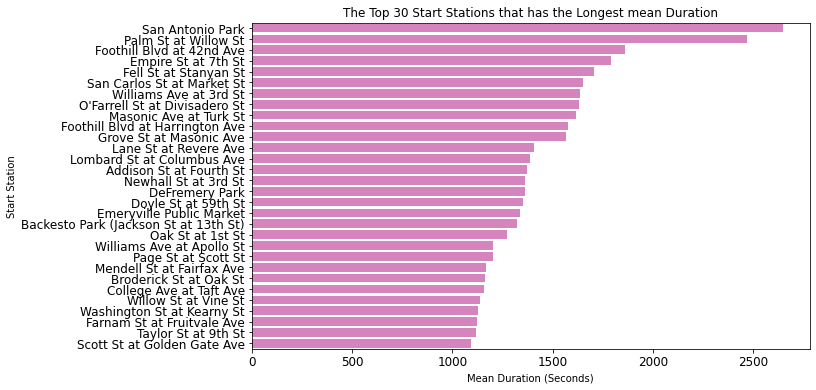

In [ ]:
longest = df_bike.groupby('start_station_name')['duration_sec'].mean().sort_values(ascending=False).head(30).reset_index()
plt.figure(figsize=[10,6])
sb.barplot(data=longest, y='start_station_name', x='duration_sec', color=base_color) \
    .set(ylabel='Start Station', xlabel='Mean Duration (Seconds)', title='The Top 30 Start Stations that has the Longest mean Duration')
for item in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    item.set_fontsize(12)

>we can see that san antonio park and palm st at willow st longest means duration are far ahead.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

###### The scatter plot shows a weak negative relationship between the duration and the age.
###### males have shorter trips than other genders.
###### customers have longer trips than subscribers.
###### sharing the bike is more common with young users around 20 age.




### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * Sharing the bike is more common with young users around 20 age.
> * Customers have longer trips than subscribers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

What is the Distribution Trip duration across user type in different days?

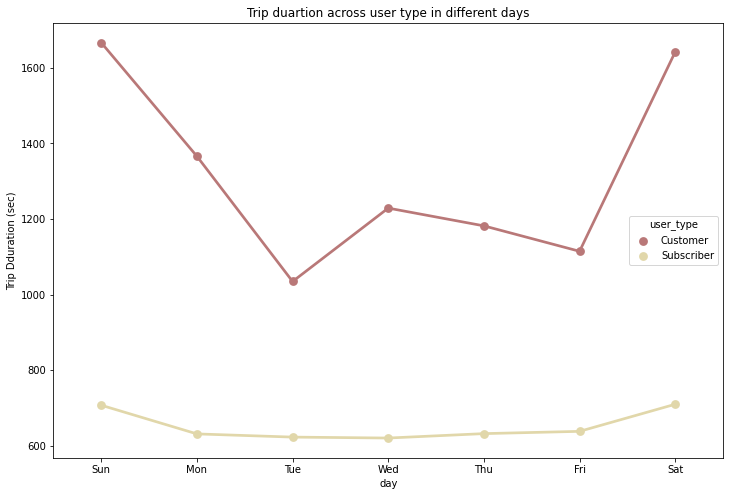

In [ ]:
fig = plt.figure(figsize = [12,8])
sb.pointplot(data = df_bike, x = 'trip_day', y = 'duration_sec', hue = 'user_type', palette = 'pink', ci=None,order=['Sun','Mon','Tue','Wed', 'Thu','Fri','Sat'] )
plt.title('Trip duartion across user type in different days')
plt.ylabel('Trip Dduration (sec)')
plt.xlabel('day')
plt.show();



> we can see that customers duartion is larger around Sunday and Saturday

##### Gander, Age and Bike Sharing

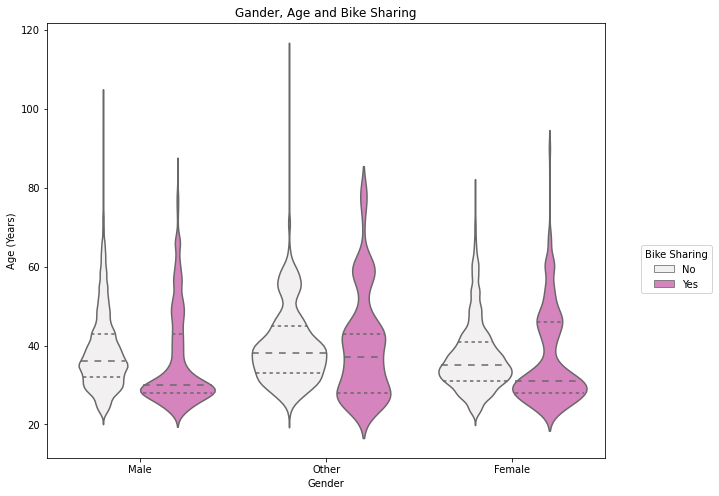

In [ ]:
plt.figure(figsize=(10, 8))
sb.violinplot(data=df_bike, x='member_gender', y='age', hue='bike_share_for_all_trip', inner='quartile', color=base_color) \
    .set(xlabel='Gender', ylabel='Age (Years)', title='Gander, Age and Bike Sharing')
plt.legend(title='Bike Sharing', bbox_to_anchor=(1.20, 0.5))

>In both sexes, bike sharing is associated with a younger age.

### Duration, Age and Bike Sharing

In [ ]:
g = sb.lmplot(data=df_bike,x='age', y='duration_sec', hue='bike_share_for_all_trip',fit_reg=False, scatter_kws={'alpha':1/12, 'color':'purple'}, size=5)
g.set_axis_labels("Age","Duration (sec)")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Duration, Age and Bike Sharing',size=16);

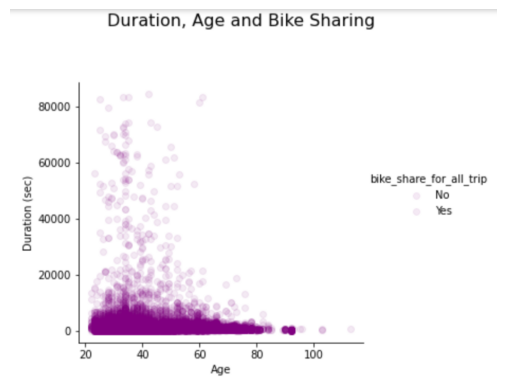

In [6]:
img = mpimg.imread('duration_age_and_bike_sharing.png')
plt.imshow(img)
plt.axis('off')
plt.show()

>There is no effect of bike sharing on the relationship between age and duration.


which gender takes the longest trips?

[Text(0.5, 1.0, 'Trip duartion across user type in different days'),
 Text(0.5, 0, 'Days'),
 Text(0, 0.5, 'Trip Dduration (sec)')]

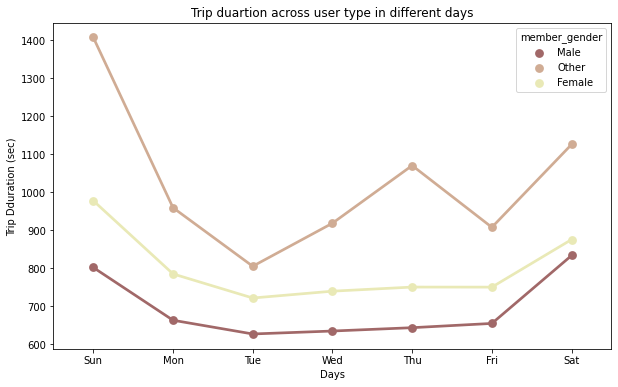

In [ ]:
fig, ax = plt.subplots(figsize=[10, 6])
sb.pointplot(data=df_bike, x='trip_day', y='duration_sec', hue='member_gender', palette='pink', ci=None, order=['Sun','Mon','Tue','Wed', 'Thu','Fri','Sat'], ax=ax)
ax.set(title='Trip duartion across user type in different days', xlabel='Days', ylabel='Trip Dduration (sec)')

> we can see that female tend to have longer trips in general.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> * customers duartion is larger around Sunday and Saturday
> * In both sexes, bike sharing is associated with a younger age.
> * There is no effect of bike sharing on the relationship between age and duration.
> * Female tend to have longer trips in general.
### Were there any interesting or surprising interactions between features?

> Unfortunately i didnt find any interesting or surprising interactions between features.

## Conclusions
> * Males have shorter trips than Female who tend to have longer trips in general.
> * Customers have longer trips than subscribers and customers duartion is larger around Sunday and Saturday.
> * Bike sharing is associated with a younger age.
